In [1]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from UsefulFunctions import LinReg
from UsefulFunctions import ScatPlotandReg
from UsefulFunctions import ScatPlotNoReg

# Import Cleaned Data

In [2]:
TCaidAgg_df = pd.read_csv("CleanedData/MedicadeAggregate.csv")
TCareAgg_df = pd.read_csv("CleanedData/MedicareAggregate.csv")
TPHIAgg_df = pd.read_csv("CleanedData/PHIAggregate.csv")

# Create graphs for comparison of Medicare, Medicaid, and Private Healthcare

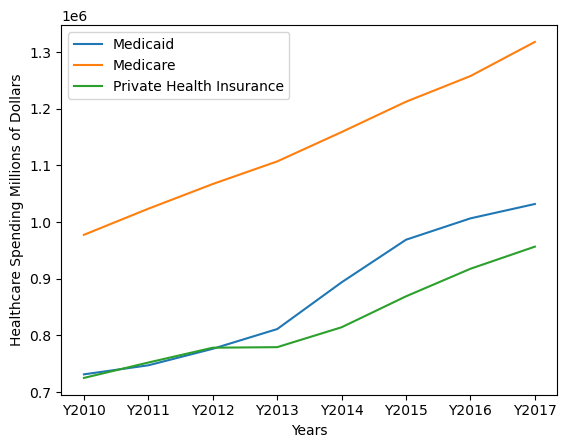

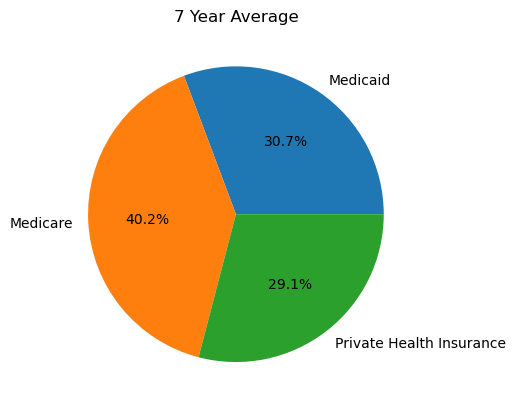

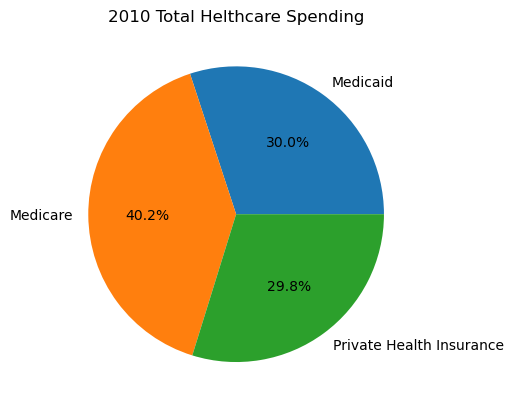

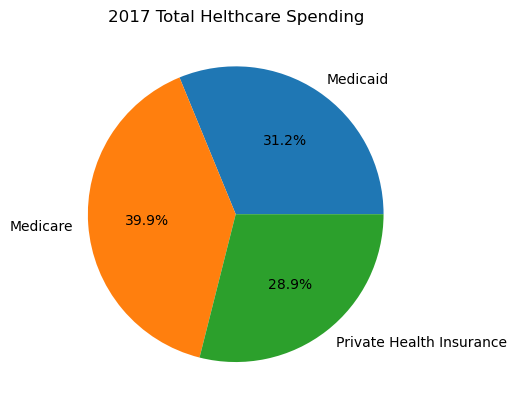

In [5]:
SumCaidAgg = TCaidAgg_df.sum()
SumCareAgg = TCareAgg_df.sum()
SumPHIAgg = TPHIAgg_df.sum()
SumCaidAgg = SumCaidAgg[["Y"+str(x) for x in range(2010,2018)]]
SumCareAgg = SumCareAgg[["Y"+str(x) for x in range(2010,2018)]]
SumPHIAgg = SumPHIAgg[["Y"+str(x) for x in range(2010,2018)]]
Caid10YAvg = round(SumCaidAgg.mean(),2)
Care10YAvg = round(SumCareAgg.mean(),2)
PHI10YAvg = round(SumPHIAgg.mean(),2)
#Graph the 3 different types of insurance payments over time.
SumCaidAgg.plot(kind = 'line',label = 'Medicaid')
SumCareAgg.plot(kind = 'line',label = 'Medicare')
SumPHIAgg.plot(kind = 'line',label = 'Private Health Insurance')
plt.xlabel('Years')
plt.ylabel('Healthcare Spending Millions of Dollars')
plt.legend(loc = 'best')
plt.savefig(f"Graphs/HealthcareSpendingOverTime")
plt.show()

#Pie graph of 3 10 year Averages
plt.pie([Caid10YAvg,Care10YAvg,PHI10YAvg],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('7 Year Average')
plt.savefig(f"Graphs/10YearSpendingAverage")
plt.show()
plt.pie([SumCaidAgg['Y2010'],SumCareAgg['Y2010'],SumPHIAgg['Y2010']],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('2010 Total Helthcare Spending')
plt.savefig(f"Graphs/2010SpendingPercentage")
plt.show()
plt.pie([SumCaidAgg['Y2017'],SumCareAgg['Y2017'],SumPHIAgg['Y2017']],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('2017 Total Helthcare Spending')
plt.savefig(f"Graphs/2020SpendingPercentage")
plt.show()